# Compare hub-height velocities

In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import pandas as pd

from matplotlib.lines import Line2D

In [2]:
def loadpickle(picklefile):
    pfile          = open(picklefile, 'rb')
    ds             = pickle.load(pfile)
    pfile.close()
    return ds


In [3]:
rotorD = 127
zHH    = 90

In [4]:
# Put the list of all cases in here
cases = [
    # AMR-Wind data defs
    {'label':'AMR-Wind',
     'datadir':'../AMR.5kmX5km_turbine1/post_processing/pklfiles/',
     'prefix':'AMRWIND',
     'fname_avg':'{prefix}_HH_avgVEL.pkl',
     'fname_inst':'{prefix}_HH_instVEL.pkl',
     'x0':2000,'y0':2560,
     'Uhfunc':(lambda ds: np.sqrt(ds['U']**2 + ds['V']**2))
    },
    
    # Nalu data defs
    {'label':'Nalu-Wind',
     'datadir':'../NALU.5kmX5km_turbine1/postprocessing/pklfiles',
     'prefix':'NALUWIND',
     'fname_avg':'{prefix}_HH_avgVEL.pkl',
     'fname_inst':'{prefix}_HH_instVEL.pkl',
     'x0':2000,'y0':2560,
     'Uhfunc':(lambda ds: np.sqrt(ds['U']**2 + ds['V']**2))
    },

    # WRF data defs
    {'label':'WRF-LES',
     'datadir':'../WRFLES.5kmX5km_turbine1/post_processing/wakesPickle_2',
     'prefix':'WRFLES',
     'fname_avg':'averageHHmaps_{prefix}_D2_wt.pkl',
     'fname_inst':'instantHHmaps_WRFLES_D2_wt.pkl',
     'linestyle':{'linestyle':'--', 'lw':2},
     'x0':500,'y0':1000,
     'Uhfunc':(lambda ds: np.sqrt(ds['U'][-50,:,:]**2 + ds['V'][-1,:,:]**2))
    },

    # WRF data defs
    {'label':'FLORIS EMGAUSS',
     'datadir':'../FLORIS_turbine1/pklfiles',
     'prefix':'FLORIS',
     'fname_avg':'{prefix}_HH_avgVEL.pkl',     
     'linestyle':{'linestyle':'--', 'lw':2},
     'x0':0,'y0':0,
     'Uhfunc':(lambda ds: np.sqrt(ds['U'][-50,:,:]**2 + ds['V'][-1,:,:]**2))
    },    
    
    # FLORIS data defs
    {'label':'FLORIS CC',
     'datadir':'../FLORIS_turbine1/pklfiles_cc',
     'prefix':'FLORIS',
     'fname_avg':'{prefix}_HH_avgVEL.pkl',     
     'linestyle':{'linestyle':'--', 'lw':2},
     'x0':0,'y0':0,
     'Uhfunc':(lambda ds: np.sqrt(ds['U'][-50,:,:]**2 + ds['V'][-1,:,:]**2))
    },
]

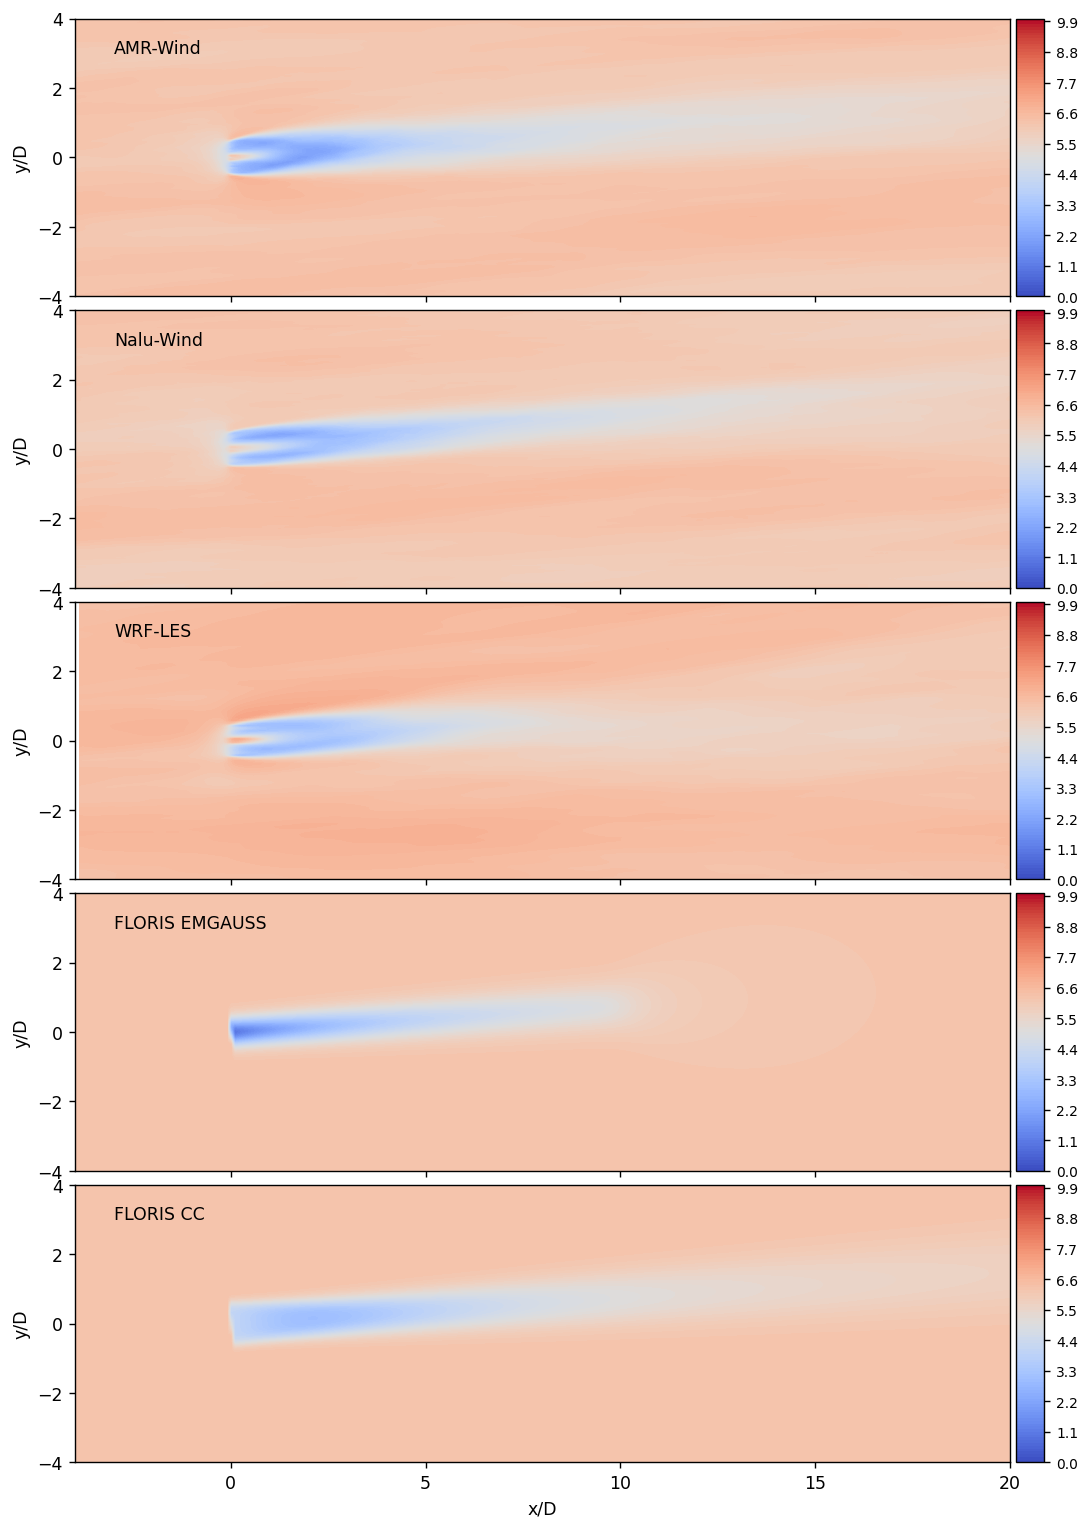

In [5]:
fig, axs = plt.subplots(len(cases),1,figsize=(10,3*len(cases)), dpi=125, sharex=True)

for icase, case in enumerate(cases):
    label   = case['label']
    prefix  = case['prefix']
    datadir = case['datadir']
    fname   = case['fname_avg']
    x0, y0   = case['x0'], case['y0']
    ax      = axs[icase]
    ds      = loadpickle(datadir+'/'+fname.format(prefix=prefix))
    
    #fig, ax = plt.subplots(1,1,figsize=(10,3), dpi=125)
    clevels=np.linspace(0, 10,101)
    Uh=np.sqrt(ds['U']**2 + ds['V']**2)
    c=ax.contourf((ds['X']-x0)/rotorD, (ds['Y']-y0)/rotorD, Uh, levels=clevels, cmap='coolwarm')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="3%", pad=0.05)
    cbar=fig.colorbar(c, ax=ax, cax=cax)
    cbar.ax.tick_params(labelsize=8)

    ax.set_xlim([-4, 20])
    ax.set_ylim([-4, 4])

    ax.text(-3, 3, label)
    ax.set_ylabel('y/D')

ax.set_xlabel('x/D')
fig.subplots_adjust(hspace=0.05)

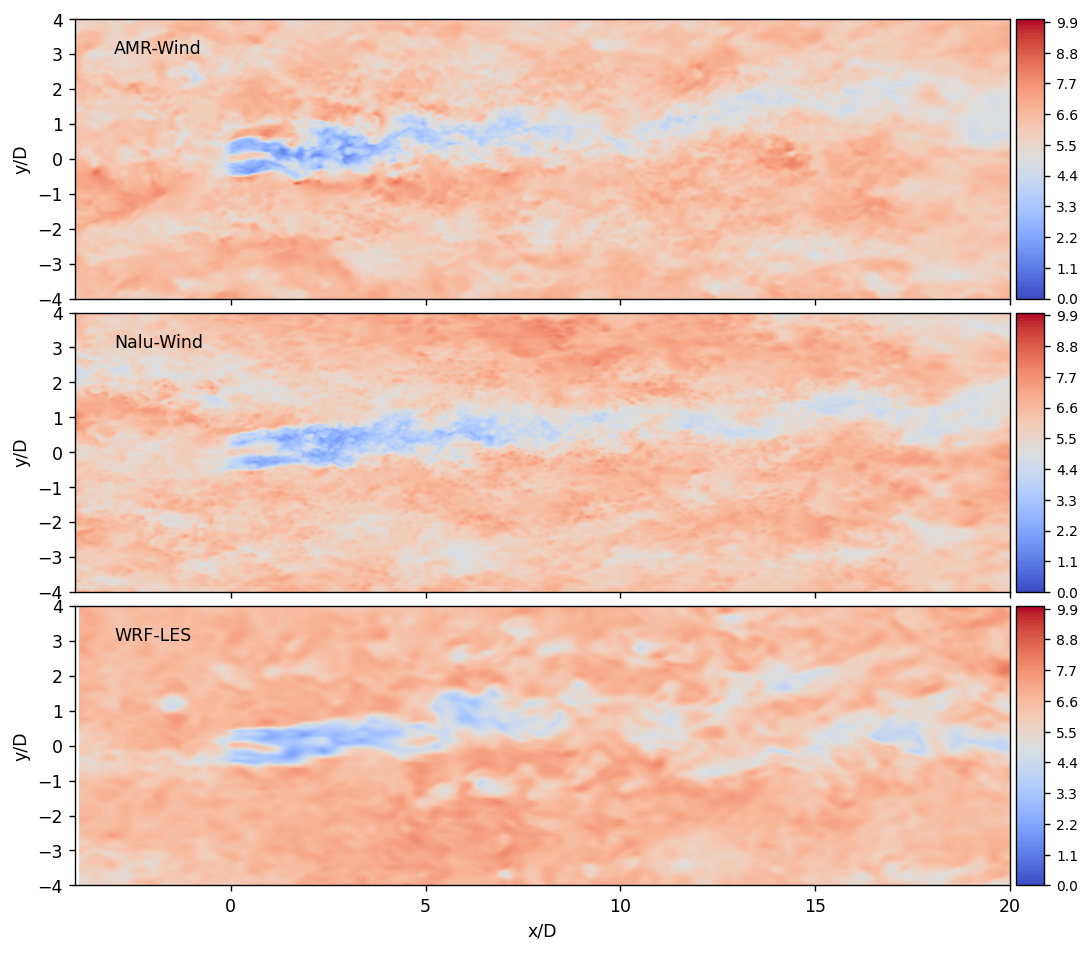

In [6]:
plotcases=[case['label'] for case in cases if 'fname_inst' in case]
fig, axs = plt.subplots(len(plotcases),1,figsize=(10,3*len(plotcases)), dpi=125, sharex=True)

for icase, case in enumerate(cases):
    label   = case['label']
    prefix  = case['prefix']
    datadir = case['datadir']
    x0, y0   = case['x0'], case['y0']
    if 'fname_inst' in case:
        fname   = case['fname_inst']
        ds      = loadpickle(datadir+'/'+fname.format(prefix=prefix))
        ax=axs[icase]
        clevels=np.linspace(0, 10,101)
        #Uh=np.sqrt(ds['U']**2 + ds['V']**2)
        Uh      = case['Uhfunc'](ds)
        c=ax.contourf((ds['X']-x0)/rotorD, (ds['Y']-y0)/rotorD, Uh, levels=clevels, cmap='coolwarm')
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="3%", pad=0.05)
        cbar=fig.colorbar(c, ax=ax, cax=cax)
        cbar.ax.tick_params(labelsize=8)

        ax.set_xlim([-4, 20])
        ax.set_ylim([-4, 4])

        #ax.set_title(label)
        ax.text(-3, 3, label)
        ax.set_ylabel('y/D')
        
ax.set_xlabel('x/D')
fig.subplots_adjust(hspace=0.05)